In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df['nilai_rata_rata']= df[['math score','reading score','writing score']].mean(axis=1)
print (df['nilai_rata_rata'].round(2))

0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Name: nilai_rata_rata, Length: 1000, dtype: float64


In [5]:
print (df[['math score', 'reading score', 'writing score']] .describe().round(2))

       math score  reading score  writing score
count     1000.00        1000.00        1000.00
mean        66.09          69.17          68.05
std         15.16          14.60          15.20
min          0.00          17.00          10.00
25%         57.00          59.00          57.75
50%         66.00          70.00          69.00
75%         77.00          79.00          79.00
max        100.00         100.00         100.00


In [6]:
desc = df[['math score', 'reading score', 'writing score']] .describe().round(2)
print(desc)

       math score  reading score  writing score
count     1000.00        1000.00        1000.00
mean        66.09          69.17          68.05
std         15.16          14.60          15.20
min          0.00          17.00          10.00
25%         57.00          59.00          57.75
50%         66.00          70.00          69.00
75%         77.00          79.00          79.00
max        100.00         100.00         100.00


In [7]:
nilai_max = df[['math score', 'reading score', 'writing score']].max().round(2)
print(nilai_max)

math score       100
reading score    100
writing score    100
dtype: int64


In [8]:
nilai_min= df[['math score', 'reading score', 'writing score','nilai_rata_rata']].min().round(2)
print(nilai_min)

math score          0.0
reading score      17.0
writing score      10.0
nilai_rata_rata     9.0
dtype: float64


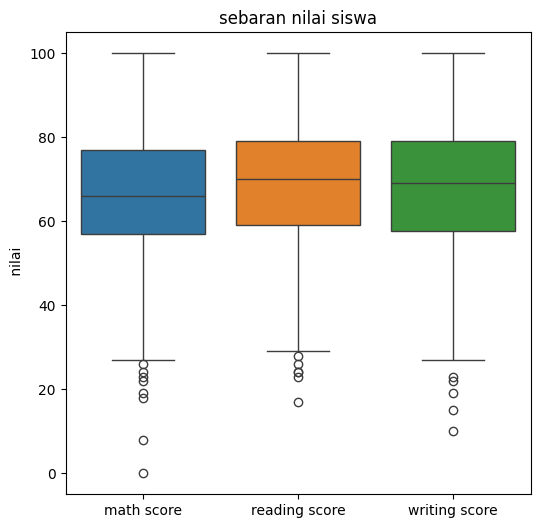

In [9]:
plt. figure(figsize=(6,6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('sebaran nilai siswa')
plt.ylabel(" nilai")
plt.show()

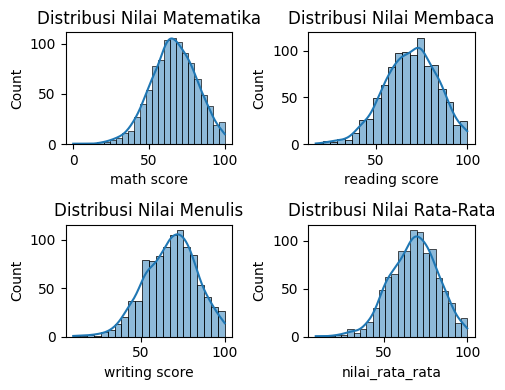

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))

plt.subplot(2, 2, 1)
sns.histplot(df['math score'], kde=True)
plt.title('Distribusi Nilai Matematika')

plt.subplot(2, 2, 2)
sns.histplot(df['reading score'], kde=True)
plt.title('Distribusi Nilai Membaca')

plt.subplot(2, 2, 3)
sns.histplot(df['writing score'], kde=True)
plt.title('Distribusi Nilai Menulis')

plt.subplot(2, 2, 4)
sns.histplot(df['nilai_rata_rata'], kde=True)
plt.title('Distribusi Nilai Rata-Rata')

plt.tight_layout()
plt.show()



In [11]:
df.groupby('gender')['nilai_rata_rata'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,69.57,14.54,9.0,60.67,70.33,78.67,100.0
male,482.0,65.84,13.70,23.0,56.00,66.33,76.25,100.0


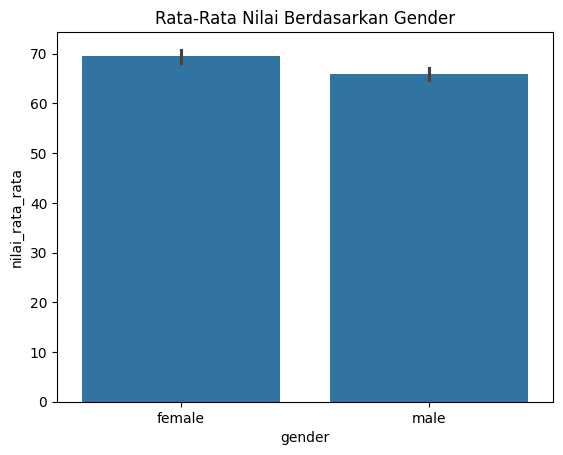

In [12]:
sns.barplot(x='gender', y='nilai_rata_rata', data=df)
plt.title('Rata-Rata Nilai Berdasarkan Gender')
plt.show()


In [13]:
group_parents = df.groupby('parental level of education')['nilai_rata_rata'].describe().round(2)

print(group_parents)


                             count   mean    std    min    25%    50%    75%  \
parental level of education                                                    
associate's degree           222.0  69.57  13.67  31.67  58.67  69.67  79.00   
bachelor's degree            118.0  71.92  13.95  39.00  64.08  71.17  80.67   
high school                  196.0  63.10  13.51  18.33  53.92  65.00  72.67   
master's degree               59.0  73.60  13.60  44.67  63.17  73.33  85.50   
some college                 226.0  68.48  13.71  23.33  60.00  68.67  78.00   
some high school             179.0  65.11  14.98   9.00  55.67  66.67  76.50   

                                max  
parental level of education          
associate's degree           100.00  
bachelor's degree            100.00  
high school                   95.67  
master's degree               97.67  
some college                  99.00  
some high school              99.00  


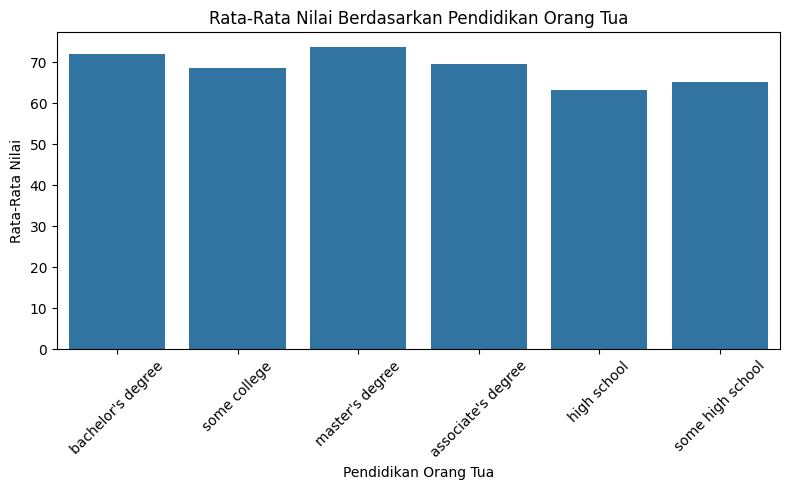

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='parental level of education',
    y='nilai_rata_rata',
    data=df,
    estimator='mean',
    errorbar=None
)
plt.xticks(rotation=45)
plt.title('Rata-Rata Nilai Berdasarkan Pendidikan Orang Tua')
plt.ylabel('Rata-Rata Nilai')
plt.xlabel('Pendidikan Orang Tua')
plt.tight_layout()
plt.show()



In [15]:
lunch_stats = df.groupby('lunch')['nilai_rata_rata'].describe() .round(2)
print(lunch_stats)

              count   mean    std   min    25%    50%    75%     max
lunch                                                               
free/reduced  355.0  62.20  14.46   9.0  52.83  62.67  72.50   97.67
standard      645.0  70.84  13.19  26.0  62.33  71.33  79.67  100.00


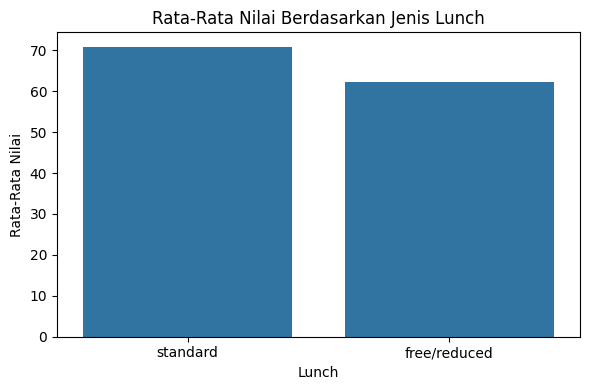

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='lunch',
    y='nilai_rata_rata',
    data=df,
    estimator='mean',
    errorbar=None
)
plt.title('Rata-Rata Nilai Berdasarkan Jenis Lunch')
plt.ylabel('Rata-Rata Nilai')
plt.xlabel('Lunch')
plt.tight_layout()
plt.show()


In [17]:
df ['test preparation course'] .value_counts()

# sebanyak 64 % siswa yang mengikuti kursus persiapan ujian dan 36 % tidak mengikuti kursus persiapan ujian

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [18]:
pengelompokan_data= df.groupby('test preparation course')[
    ['math score', 'reading score','writing score','nilai_rata_rata']
    ].mean().round(2)
urutan_pengelompokan_data = pengelompokan_data.sort_values('nilai_rata_rata',ascending=False) 
print(urutan_pengelompokan_data)

# siswa yang mengikuti test preparation course menunjukkan rata-rata nilai yang lebih tinggi 
# dibandingkan siswa yang tidak mengikuti, dengan selisih sekitar 7–8 poin.

                         math score  reading score  writing score  \
test preparation course                                             
completed                     69.70          73.89          74.42   
none                          64.08          66.53          64.50   

                         nilai_rata_rata  
test preparation course                   
completed                          72.67  
none                               65.04  


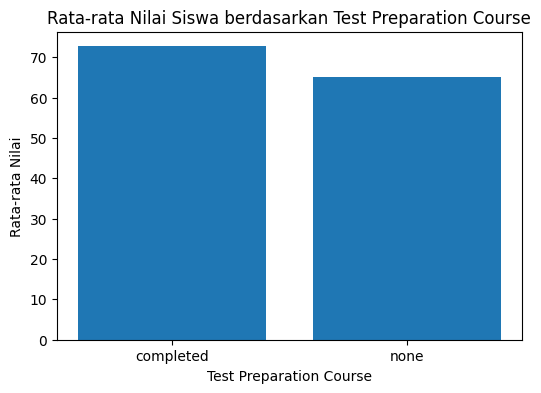

In [19]:
plt.figure(figsize=(6,4))
plt.bar(urutan_pengelompokan_data.index, urutan_pengelompokan_data['nilai_rata_rata'])
plt.xlabel('Test Preparation Course')
plt.ylabel('Rata-rata Nilai')
plt.title('Rata-rata Nilai Siswa berdasarkan Test Preparation Course')
plt.show()


In [20]:
# Secara keseluruhan, analisis eksploratif menunjukkan bahwa performa akademik siswa tidak hanya dipengaruhi oleh kemampuan individu, 
# tetapi juga berkaitan dengan beberapa faktor lain, seperti 
# jenis makan siang, tingkat pendidikan orang tua, serta partisipasi dalam program persiapan ujian. 
# Siswa dengan kondisi ekonomi yang lebih baik (standard lunch), orang tua berpendidikan lebih tinggi,
# dan yang mengikuti test preparation course cenderung memiliki rata-rata nilai yang lebih tinggi. 

In [21]:
df['label_nilai_tinggi'] = (df['nilai_rata_rata'] >= 70).astype(int)

fitur = ['gender', 'lunch', 'parental level of education', 'test preparation course']

X = df[fitur]
y = df['label_nilai_tinggi']


In [22]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,gender_male,lunch_standard,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,False,True,True,False,False,False,False,True
1,False,True,False,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,True,False,False,False,False,False,False,True
4,True,True,False,False,False,True,False,True


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 0.63
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       110
           1       0.59      0.60      0.59        90

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



In [26]:
coef_df = pd.DataFrame({
    'fitur': X_encoded.columns,
    'koefisien': model.coef_[0]
})

# bulatkan ke 2 angka di belakang koma
coef_df['koefisien'] = coef_df['koefisien'].round(2)

# urutkan setelah dibulatkan
coef_df = coef_df.sort_values('koefisien', ascending=False)

print(coef_df)


                                           fitur  koefisien
1                                 lunch_standard       1.18
2  parental level of education_bachelor's degree       0.49
4    parental level of education_master's degree       0.21
5       parental level of education_some college       0.01
6   parental level of education_some high school      -0.28
3        parental level of education_high school      -0.59
0                                    gender_male      -0.64
7                   test preparation course_none      -1.15


In [28]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_cols.corr().round(2)

corr_matrix


,math score,reading score,writing score,nilai_rata_rata
math score,1.00,0.82,0.80,0.92
reading score,0.82,1.00,0.95,0.97
writing score,0.80,0.95,1.00,0.97
nilai_rata_rata,0.92,0.97,0.97,1.00


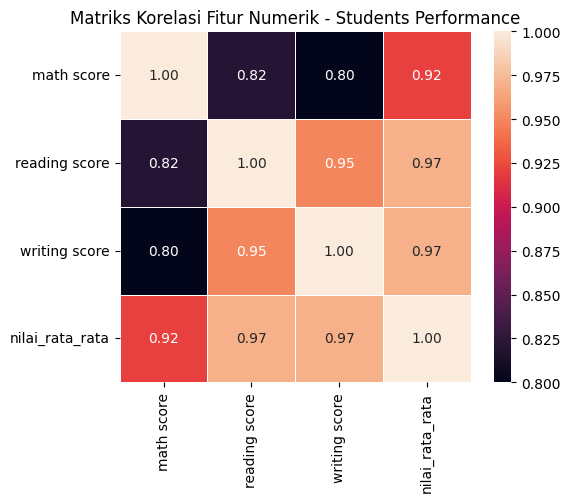

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix,
            annot=True,       
            fmt=".2f",         
            linewidths=0.5,    
            square=True,
            cbar=True)

plt.title("Matriks Korelasi Fitur Numerik - Students Performance")
plt.tight_layout()
plt.show()
